In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('student_scores - student_scores.csv')

Text(0, 0.5, 'y (Target) : Scores')

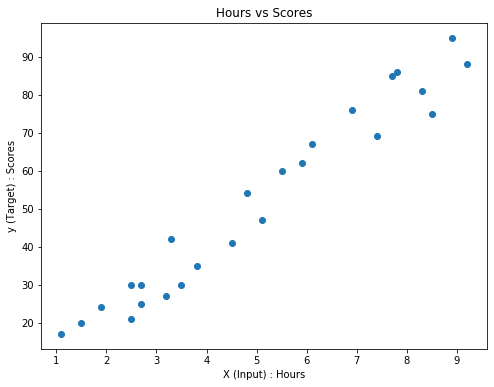

In [9]:
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores'])
# Plotting the data X(Hours) on x-axis and y(Scores) on y-axis
plt.figure(figsize=(8,6)) # figure size
plt.scatter(X, y)
plt.title('Hours vs Scores')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')

In [14]:
class LinReg():
    def __init__(self, lr, epochs):
        self.weights = None
        self.bias = None
        self.lr = lr
        self.epochs = epochs
        
        
        
    def fit(self, X, Y):
        
        ## lets say X have dimension 100 * 4
        m, n = X.shape
        self.weights = np.zeros((n,1))
        self.bias = 0
        
        y = Y.reshape(m,1)
        
        losses = []
        
        for _ in range(self.epochs):
            
            y_hat = np.dot(X, self.weights) + self.bias
            loss = np.mean((y_hat - y)**2)
            
            losses.append(loss)
            
            dw = (1/m)*np.dot(X.T, (y_hat-y))
            db = (1/m)*np.sum((y_hat - y))
            
            self.weights -= self.lr * dw
            self.bias -= self.lr*db
            
        return self.weights, self.bias, losses
    
    
    
    def predict(self, X):
        
        return np.dot(X, self.weights) + self.bias
        
            
        
        
        
        
        
        
        
        
        
        

In [15]:
X_train, X_test, y_train, y_test = X[:20], X[20:], y[:20], y[20:]
model = LinReg(epochs=100, lr=0.01)
w, b, l = model.fit(X_train,y_train)

Text(0, 0.5, 'y (Target) : Scores')

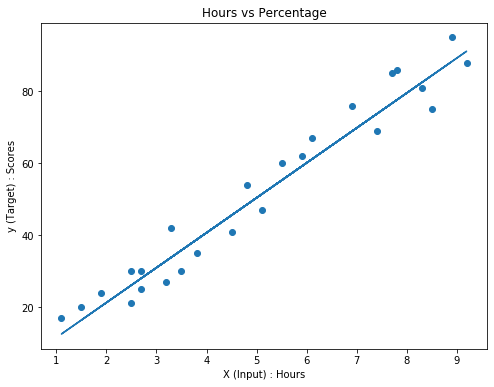

In [18]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, model.predict(X))  # X and predictions.
plt.title('Hours vs Percentage')
plt.xlabel('X (Input) : Hours')
plt.ylabel('y (Target) : Scores')

In [19]:
X_test_preds = model.predict(X_test)
X_test_preds


array([[28.05316177],
       [48.44669117],
       [38.73548669],
       [68.84022056],
       [77.58030459]])

Text(0, 0.5, 'Loss / Cost')

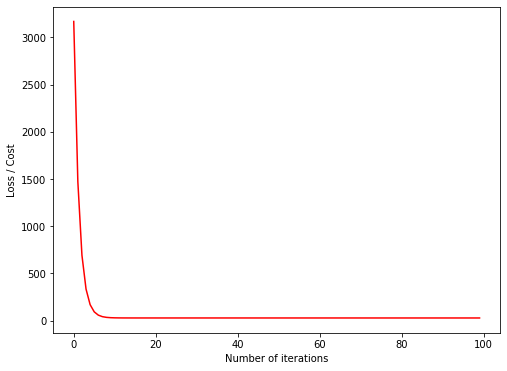

In [20]:
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(100)], l, 'r-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss / Cost')